In [1]:
import requests

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator"
params = {
    "name1": "Diana",
    "name2": "Carlos"
}

headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": "d27792672emsh780d9c146ed565ap117cfajsn614c166dfb2a"  # Usa una variable de entorno en lugar de escribirla en el código
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error {response.status_code}: {response.text}")


/Users/regina/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}


2 listas, nombre 1 Diana  2 lista (de actores).   Iterando, append, guardando y así mantenemos una database que contenga name1(siempre será Diana), name2, lovePercentage. Y ya con eso hacer gráficos.

In [12]:
#30 novios de Diana 
#1. Webscrapear nombres de actores, sus fotos y sus edades
#2. Con la api, crear un bucle que use la API para obtener el lovePercentage con Diana y todos los nombres de actores
#3. Guardar los resultados dataframe 
#4. Streamlit



In [13]:
# 1. Webscrapear nombres de actores, sus fotos y sus edades
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.okchicas.com/tu/hombres/actores-menores-de-45-guapos/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


In [14]:
#obtener los nombres de los actores
soup.find_all("h2")
lista_actores = soup.find_all("h2")
lista_actores

#eliminar el "1." de cada nombre
lista_actores = [actor.text[3:] for actor in lista_actores]
lista_actores

#eliminar el espacio " " al principio de los nombres que tengan ese espacio
lista_actores = [actor[1:] if actor[0] == " " else actor for actor in lista_actores]

#eliminar el último elemento de la lista
lista_actores = lista_actores[:-1]
lista_actores

['Theo James',
 'Aaron Taylor-Johnson',
 'Liam Hemsworth',
 'Tyler Hoechlin',
 'Robert Pattinson',
 'Tom Hardy',
 'Justin Baldoni',
 'Chris Hemsworth',
 'Martiño Rivas',
 'Tom Ellis',
 'Alexander Skarsgård',
 'Michael Fassbender',
 'Tom Hiddleston',
 'Evan Peters',
 'Michele Morrone',
 'Henry Cavill',
 'Jake Gyllenhaal',
 'Richard Madden',
 'Sam Claflin',
 'Mario Casas',
 'Jamie Dornan',
 'Sam Heughan',
 'Sebastian Stan',
 'Ryan Gosling',
 'Charlie Hunnam',
 'Chris Evans',
 'Yon Gonzalez',
 'Jason Momoa',
 'Joe Manganiello',
 'Travis Fimmel']

In [15]:
#obtener la edad de los actores
import re 
soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")
#sacar todos los números antes de "años" "añitos"
todoslosparrafos = soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")
todoslosparrafos
#siguiente paso, asilar los números de los textos


[<p>Ya hemos dejando en claro que los hombres mayores, de esos que llaman señores, son muy pero muy guapos sin importar la edad. Sin embargo, no por eso vamos a olvidar a todos aquellos que están entre los 30 y los 45.</p>,
 <p>Por esta razón te mostramos a estos 30 actores que ya no son unos chavos jóvenes, pero tampoco son tan grandes como para ser <em>sugar daddy</em>, y aunque estén a punto de llegar al quinto piso, cada año se ponen más hermosos.</p>,
 <p><a class="full-img" href="https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos.png"><img alt="Theo James" class="alignnone size-large wp-image-471411" decoding="async" height="700" sizes="(max-width: 628px) 100vw, 628px" src="https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-628x700.png" srcset="https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-628x700.png 628w, https://www.okchicas.com/wp-content/uploads/202

In [16]:
pattern = r"(\d{1,2})\s*(años|añitos)"
edades = []
for p in todoslosparrafos:
    texto = p.get_text()  # Extrae el texto del Tag
    edad = re.findall(pattern, texto)  # Aplica la expresión regular al texto
    if edad:
        edades.append(edad[0][0])

edades

['37',
 '30',
 '31',
 '33',
 '35',
 '44',
 '37',
 '37',
 '36',
 '42',
 '44',
 '44',
 '34',
 '30',
 '38',
 '41',
 '34',
 '35',
 '34',
 '38',
 '38',
 '40',
 '40',
 '40',
 '34',
 '41',
 '45']

In [17]:
#oops, a Tom Hiddleston no le pusieron "40 años" si no "cuarto piso"

edades.insert(12, '40')
 # Recuerda que las listas en Python son indexadas desde 0, por lo que la posición 13 es el índice 12.


In [18]:
edades

['37',
 '30',
 '31',
 '33',
 '35',
 '44',
 '37',
 '37',
 '36',
 '42',
 '44',
 '44',
 '40',
 '34',
 '30',
 '38',
 '41',
 '34',
 '35',
 '34',
 '38',
 '38',
 '40',
 '40',
 '40',
 '34',
 '41',
 '45']

In [19]:
#oops mismo error para la posición 22
# Inserta el valor 40 en la posición 22 (índice 21)
edades.insert(21, '40')

In [20]:
edades

['37',
 '30',
 '31',
 '33',
 '35',
 '44',
 '37',
 '37',
 '36',
 '42',
 '44',
 '44',
 '40',
 '34',
 '30',
 '38',
 '41',
 '34',
 '35',
 '34',
 '38',
 '40',
 '38',
 '40',
 '40',
 '40',
 '34',
 '41',
 '45']

In [21]:
#oops a . Travis Fimmel le pusieron "41 añotes"
# Añade '41' al final de la lista
edades.append('41')

In [22]:
edades
#listo, ya en orden edades. 

['37',
 '30',
 '31',
 '33',
 '35',
 '44',
 '37',
 '37',
 '36',
 '42',
 '44',
 '44',
 '40',
 '34',
 '30',
 '38',
 '41',
 '34',
 '35',
 '34',
 '38',
 '40',
 '38',
 '40',
 '40',
 '40',
 '34',
 '41',
 '45',
 '41']

In [23]:
#obtener las imagenes de los actores 
# Extraer todos los párrafos con imágenes
parrafos_con_imagenes = soup.find_all("div", class_="entry-content", itemprop="text")[0].find_all("p")

# Lista para almacenar las URLs de las imágenes
urls_imagenes_p = []

# Buscar las imágenes dentro de los párrafos
for p in parrafos_con_imagenes:
    # Si el párrafo contiene una etiqueta <img>
    img_tag = p.find('img')
    if img_tag and 'src' in img_tag.attrs:
        # Verificar que la imagen tiene la extensión .png
        if img_tag['src'].endswith('.png'):
            urls_imagenes_p.append(img_tag['src'])

# Mostrar las URLs de las imágenes .png
print(urls_imagenes_p)


['https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-2-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-3-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-4-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-5-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-6-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-7-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-8-628x700.png', 'https://www.okchicas.com/wp-content/uploads/2021/04/actores-menores-de-45-guapos-atractivos-9-627x700.png', 'https://www.okchica

In [24]:
#checando que estén en orden
lista_actores



['Theo James',
 'Aaron Taylor-Johnson',
 'Liam Hemsworth',
 'Tyler Hoechlin',
 'Robert Pattinson',
 'Tom Hardy',
 'Justin Baldoni',
 'Chris Hemsworth',
 'Martiño Rivas',
 'Tom Ellis',
 'Alexander Skarsgård',
 'Michael Fassbender',
 'Tom Hiddleston',
 'Evan Peters',
 'Michele Morrone',
 'Henry Cavill',
 'Jake Gyllenhaal',
 'Richard Madden',
 'Sam Claflin',
 'Mario Casas',
 'Jamie Dornan',
 'Sam Heughan',
 'Sebastian Stan',
 'Ryan Gosling',
 'Charlie Hunnam',
 'Chris Evans',
 'Yon Gonzalez',
 'Jason Momoa',
 'Joe Manganiello',
 'Travis Fimmel']

In [25]:
# PREPARATE PARA VER 30 HOMBRES GUAPOS
# ver imagenes# ! New library to display images
from IPython.display import Image

# Lista de URLs de las imágenes (por ejemplo, las que obtuviste previamente)
urls_imagenes_p
# Mostrar las imágenes
for url in urls_imagenes_p:
    display(Image(url=url))


In [26]:
#juntar nombres, edades e imagenes en un dataframe
hombres_guapos = pd.DataFrame({
    "Nombre": lista_actores,
    "Edad": edades,
    "Imagen": urls_imagenes_p
})

In [27]:
hombres_guapos

,Nombre,Edad,Imagen
0,Theo James,37,https://www.okchicas.com/wp-content/uploads/20...
1,Aaron Taylor-Johnson,30,https://www.okchicas.com/wp-content/uploads/20...
2,Liam Hemsworth,31,https://www.okchicas.com/wp-content/uploads/20...
3,Tyler Hoechlin,33,https://www.okchicas.com/wp-content/uploads/20...
4,Robert Pattinson,35,https://www.okchicas.com/wp-content/uploads/20...
5,Tom Hardy,44,https://www.okchicas.com/wp-content/uploads/20...
6,Justin Baldoni,37,https://www.okchicas.com/wp-content/uploads/20...
7,Chris Hemsworth,37,https://www.okchicas.com/wp-content/uploads/20...
8,Martiño Rivas,36,https://www.okchicas.com/wp-content/uploads/20...
9,Tom Ellis,42,https://www.okchicas.com/wp-content/uploads/20...


In [28]:

#cambiar edad a numero 
hombres_guapos["Edad"] = hombres_guapos["Edad"].astype(int)
#cambiar nombre a string
hombres_guapos["Nombre"] = hombres_guapos["Nombre"].astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  30 non-null     object
 1   Edad    30 non-null     int64 
 2   Imagen  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


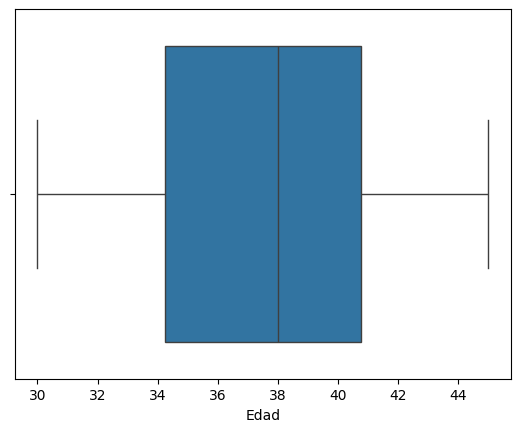

In [29]:
#EDA 
hombres_guapos.info()
hombres_guapos.describe()
hombres_guapos.head()
hombres_guapos.tail()

# boxplot de edades
# instalar seaborn
#import sys
#!{sys.executable} -m pip install seaborn

#import sys
#!{sys.executable} -m pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=hombres_guapos, x="Edad")
plt.show()

In [30]:
pip install streamlit-extras


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
key = "d27792672emsh780d9c146ed565ap117cfajsn614c166dfb2a"

In [32]:
# 2. Con la api, crear un bucle que use la API para obtener el lovePercentage con Diana y todos los nombres de actores
#queremos saber la compatibilidad de Diana con cada uno de los actores, por lo que necesitamos hacer una petición a la API por cada actor
#usando el df de hombres guapos y la columna nombre.

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator" #conectate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": key 
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los nombres de los actores
for nombre in hombres_guapos["Nombre"]: #l a variable nombre tomará el valor de cada actor en la columna "Nombre"
    params = { #Aquí, se está creando un diccionario llamado params con dos claves:
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200: #si todo bien
        data = response.json() #guarda la respuesta en formato json
        love_percentage = data.get("lovePercentage") #guarda el porcentaje de compatibilidad
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage}) #guarda los resultados en un diccionario
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#oops un error Error 400: {"status":"error","error":{"invalid":["name2: must be only letters and spaces and less than 100 characters"]},"data":null,"code":400}




Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/

In [33]:
#ver nombres inválidos
for nombre in hombres_guapos["Nombre"]:
    if not bool(re.match("^[A-Za-z ]+$", nombre)):
        print(f"Nombre inválido: {nombre}")



Nombre inválido: Aaron Taylor-Johnson
Nombre inválido: Martiño Rivas
Nombre inválido: Alexander Skarsgård


In [34]:
# Función para corregir los nombres
def corregir_nombre(nombre):
    # Eliminar caracteres no permitidos (como guiones, comas, etc.)
    nombre_corregido = re.sub(r'[^A-Za-z ]', '', nombre)
    return nombre_corregido

# Aplicar la corrección a la columna "Nombre" sin cambiar el orden
hombres_guapos["Nombre"] = hombres_guapos["Nombre"].apply(corregir_nombre)

# Verificar el resultado
print(hombres_guapos)

                 Nombre  Edad  \
0            Theo James    37   
1   Aaron TaylorJohnson    30   
2        Liam Hemsworth    31   
3        Tyler Hoechlin    33   
4      Robert Pattinson    35   
5             Tom Hardy    44   
6        Justin Baldoni    37   
7       Chris Hemsworth    37   
8          Martio Rivas    36   
9             Tom Ellis    42   
10   Alexander Skarsgrd    44   
11   Michael Fassbender    44   
12       Tom Hiddleston    40   
13          Evan Peters    34   
14      Michele Morrone    30   
15         Henry Cavill    38   
16      Jake Gyllenhaal    41   
17       Richard Madden    34   
18          Sam Claflin    35   
19          Mario Casas    34   
20         Jamie Dornan    38   
21          Sam Heughan    40   
22       Sebastian Stan    38   
23         Ryan Gosling    40   
24       Charlie Hunnam    40   
25          Chris Evans    40   
26         Yon Gonzalez    34   
27          Jason Momoa    41   
28      Joe Manganiello    45   
29        

In [35]:
#ahora sí, la api
# 2. Con la api, crear un bucle que use la API para obtener el lovePercentage con Diana y todos los nombres de actores
#queremos saber la compatibilidad de Diana con cada uno de los actores, por lo que necesitamos hacer una petición a la API por cada actor
#usando el df de hombres guapos y la columna nombre.

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator" #conectate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": key 
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los nombres de los actores
for nombre in hombres_guapos["Nombre"]: #l a variable nombre tomará el valor de cada actor en la columna "Nombre"
    params = { #Aquí, se está creando un diccionario llamado params con dos claves:
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200: #si todo bien
        data = response.json() #guarda la respuesta en formato json
        love_percentage = data.get("lovePercentage") #guarda el porcentaje de compatibilidad
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage}) #guarda los resultados en un diccionario
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#hay algo mal xq compatibilidad me sale puro none 

Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/

In [36]:
#ahora sí, la api
# 2. Con la api, crear un bucle que use la API para obtener el lovePercentage con Diana y todos los nombres de actores
#queremos saber la compatibilidad de Diana con cada uno de los actores, por lo que necesitamos hacer una petición a la API por cada actor
#usando el df de hombres guapos y la columna nombre.

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator" #conectate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": "25fba63263msh6cd8a16bfec0579p179209jsnf759b9f2a85c" 
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los nombres de los actores
for nombre in hombres_guapos["Nombre"][:3]: #l a variable nombre tomará el valor de cada actor en la columna "Nombre"
    params = { #Aquí, se está creando un diccionario llamado params con dos claves:
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200: #si todo bien
        data = response.json() #guarda la respuesta en formato json
        love_percentage = data.get("lovePercentage") #guarda el porcentaje de compatibilidad
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage}) #guarda los resultados en un diccionario
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#hay algo mal xq compatibilidad me sale puro none 

Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Empty DataFrame
Columns: []
Index: []


In [37]:
#revisando si es por el porcentaje 
#spoiler, sí era el porcentaje

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator"  # Conéctate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": "25fba63263msh6cd8a16bfec0579p179209jsnf759b9f2a85c" 
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer solo los primeros 3 nombres de los actores
for nombre in hombres_guapos["Nombre"][:3]:  # Tomamos solo los primeros 3 nombres
    params = {  # Aquí se está creando un diccionario con las claves
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:  # Si todo está bien
        data = response.json()  # Guarda la respuesta en formato JSON
        
        # Verifica si la respuesta contiene el campo 'lovePercentage'
        love_percentage = data.get("data", {}).get("lovePercentage")
        
        # Si lovePercentage existe, eliminamos el % y lo convertimos en un número
        if love_percentage:
            love_percentage = love_percentage.replace('%', '')  # Elimina el '%'
            try:
                love_percentage = int(love_percentage)  # Convierte a entero
            except ValueError:
                love_percentage = None  # Si no puede convertir, asignamos None
        else:
            love_percentage = None
        
        # Guarda los resultados en un diccionario
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage})
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)


Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Empty DataFrame
Columns: []
Index: []


In [38]:
#ya corrigiendo para el porcentaje

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator"  # Conéctate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": "25fba63263msh6cd8a16bfec0579p179209jsnf759b9f2a85c"  
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los primeros 3 nombres de los actores
for nombre in hombres_guapos["Nombre"][:3]:  # Tomamos solo los primeros 3 nombres
    params = {  # Aquí se está creando un diccionario con las claves
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:  # Si todo está bien
        data = response.json()  # Guarda la respuesta en formato JSON
        
        # Verifica si la respuesta contiene el campo 'lovePercentage'
        love_percentage = data.get("data", {}).get("lovePercentage")
        
        # Si lovePercentage existe, eliminamos el '%' y lo convertimos en un número
        if love_percentage:
            love_percentage = love_percentage.replace('%', '')  # Elimina el '%'
            try:
                love_percentage = int(love_percentage)  # Convierte a entero
                love_percentage = f"{love_percentage}%"  # Vuelve a agregar el '%'
            except ValueError:
                love_percentage = None  # Si no puede convertir, asignamos None
        else:
            love_percentage = None
        
        # Guarda los resultados en un diccionario
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage})
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#ya funciona!! 

Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Empty DataFrame
Columns: []
Index: []


In [39]:
#ya ahora sí, saquemos todos los nombres
#ya corrigiendo para el porcentaje

url = "https://love-compatibility-calculator-api-apiverve.p.rapidapi.com/v1/lovecalculator"  # Conéctate al API
headers = {
    "Accept": "application/json",
    "x-rapidapi-host": "love-compatibility-calculator-api-apiverve.p.rapidapi.com",
    "x-rapidapi-key": "25fba63263msh6cd8a16bfec0579p179209jsnf759b9f2a85c"  
}

# Lista para almacenar los resultados
compatibilidad = []

# Bucle para recorrer los primeros 3 nombres de los actores
for nombre in hombres_guapos["Nombre"]:  # Tomamos solo los primeros 3 nombres
    params = {  # Aquí se está creando un diccionario con las claves
        "name1": "Diana",
        "name2": nombre
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:  # Si todo está bien
        data = response.json()  # Guarda la respuesta en formato JSON
        
        # Verifica si la respuesta contiene el campo 'lovePercentage'
        love_percentage = data.get("data", {}).get("lovePercentage")
        
        # Si lovePercentage existe, eliminamos el '%' y lo convertimos en un número
        if love_percentage:
            love_percentage = love_percentage.replace('%', '')  # Elimina el '%'
            try:
                love_percentage = int(love_percentage)  # Convierte a entero
                love_percentage = f"{love_percentage}%"  # Vuelve a agregar el '%'
            except ValueError:
                love_percentage = None  # Si no puede convertir, asignamos None
        else:
            love_percentage = None
        
        # Guarda los resultados en un diccionario
        compatibilidad.append({"Diana": "Diana", "Actor": nombre, "Compatibilidad": love_percentage})
    else:
        print(f"Error {response.status_code}: {response.text}")

# Convertimos la lista de resultados en un DataFrame
compatibilidad_res = pd.DataFrame(compatibilidad)

# Mostramos el DataFrame resultante
print(compatibilidad_res)

#ya funciona!! 

Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/rapidapi.com\/evlar-evlar-default\/api\/love-compatibility-calculator-api-apiverve"}
Error 429: {"message":"You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https:\/\/

In [40]:
#unimos el data frame hombres_guapos con el de  compatibilidad_res por medio de los nombres de actor
#cambiamos el nombre de la columna "Actor" a "Nombre" para que coincida con el df hombres_guapos
compatibilidad_res = compatibilidad_res.rename(columns={"Actor": "Nombre"})
#unimos los dataframes
Novios_Diana = pd.merge(hombres_guapos, compatibilidad_res, on="Nombre")
compatibilidad_res

KeyError: 'Nombre'

In [ ]:
guardar_resultado_api = compatibilidad_res

In [ ]:
Novios_Diana

,Nombre,Edad,Imagen,Diana,Compatibilidad
0,Theo James,37,https://www.okchicas.com/wp-content/uploads/20...,Diana,83%
1,Aaron TaylorJohnson,30,https://www.okchicas.com/wp-content/uploads/20...,Diana,85%
2,Liam Hemsworth,31,https://www.okchicas.com/wp-content/uploads/20...,Diana,83%
3,Tyler Hoechlin,33,https://www.okchicas.com/wp-content/uploads/20...,Diana,95%
4,Robert Pattinson,35,https://www.okchicas.com/wp-content/uploads/20...,Diana,63%
5,Tom Hardy,44,https://www.okchicas.com/wp-content/uploads/20...,Diana,71%
6,Justin Baldoni,37,https://www.okchicas.com/wp-content/uploads/20...,Diana,72%
7,Chris Hemsworth,37,https://www.okchicas.com/wp-content/uploads/20...,Diana,92%
8,Martio Rivas,36,https://www.okchicas.com/wp-content/uploads/20...,Diana,82%
9,Tom Ellis,42,https://www.okchicas.com/wp-content/uploads/20...,Diana,74%


In [ ]:
Novios_Diana
#eliminamos la columna Diana 
Novios_Diana = Novios_Diana.drop(columns="Diana")
Novios_Diana


NameError: name 'Novios_Diana' is not defined

In [41]:
#quiero que la columna después de Nombre sea la de compatibilidad
columnas = Novios_Diana.columns.tolist()
columnas
columnas = ["Nombre", "Compatibilidad", "Edad", "Imagen"]
columnas
Novios_Diana = Novios_Diana[columnas]
Novios_Diana

NameError: name 'Novios_Diana' is not defined

AQUÍ TERMINA EL PROCESO DE CONSTRUCCIÓN DEL DF
Ahora vamos con streamlit



In [ ]:
# Guardar el DataFrame en un archivo CSV
Novios_Diana.to_csv('compatibilidad_diana.csv', index=False)


In [ ]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [ ]:


Novios_Diana["Compatibilidad"].min()
#max
Novios_Diana["Compatibilidad"].max()
#dividiendo en cuartiles
Novios_Diana["Compatibilidad"].quantile([0.25, 0.5, 0.75])


NameError: name 'read_csv' is not defined